## Load MNIST on Python 3.x

In [1]:
import pickle
import gzip
import numpy as np
import math

In [2]:
# filename = 'mnist.pkl.gz'
data = {
    'mnist': 'data/mnist.pkl.gz',
    'usps': 'data/USPSdata/Numerals'
}
f = gzip.open(data['mnist'], 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()
# Separating Data and Targets
training_tar, validation_tar, test_tar = training_data[1], validation_data[1], test_data[1]

training_data, validation_data, test_data = training_data[0], validation_data[0], test_data[0]


## Load USPS on Python 3.x

In [5]:
from PIL import Image
import os
import numpy as np
USPSMat  = []
USPSTar  = []
curPath  = 'data/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

USPSMat = np.asarray(USPSMat)
USPSTar = np.asarray(USPSTar)
USPSLabel = reformat(USPSTar)

In [6]:
print(len(training_data), len(validation_data), len(test_data))

50000 10000 10000


In [7]:
# print(training_data[0].shape, USPSMat[0].shape)

In [8]:
def reformat(labels):
    num_labels = 10
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return labels

In [9]:
train_labels = reformat(training_tar)
valid_labels = reformat(validation_tar)
test_labels = reformat(test_tar)

## Softmax Logistic Regression

In [10]:
def get_probabilities(X, theta):
    t = np.dot(X, theta)
    prob_vector = softmax(t)
    return prob_vector


def calculate_entropy_loss(X, w, y):
    loss = 0
    t = np.dot(X, w)
    for i in range(len(t)):
        loss += -1 * np.dot(y[i], np.log(t[i].T))
    return float(loss)/len(t)


def softmax(t):
    prob_matrix = []
    for i in range(len(t)):
        prob_vector = []
        sum_exp = 0
        for j in t[i]:
            sum_exp += np.exp(j)
        for k in t[i]:
            prob_vector.append(float(np.exp(k))/sum_exp)
        prob_matrix.append(prob_vector)
    return np.array(prob_matrix)


def add_ones(X):
    return np.hstack((np.zeros(shape=(X.shape[0], 1), dtype='float') + 1, X))


def one_hot_encoding(t):
    return np.argmax(t, axis=1)


def accuracy(y, t):
    count = 0
    for i in range(len(y)):
        if y[i] == t[i]:
            count += 1
    return float(count)/len(y)


In [11]:
def train_log_regression(X, y, valid_dataset, valid_labels, raw_train_labels, raw_valid_labels):
    X = add_ones(X)  # Bias term
    maxiter = 100
    batch_size = 128
    m, n = X.shape[0], X.shape[1]
    theta = np.random.rand(n, len(y[0]))  # Initialise random weights
    lmbda, alpha = 0.01, 0.01
    max_error = 0.1
    loss = 10
    err_iteration = []
    train_accuracy, validation_accuracy = [], []
    for iteration in range(maxiter):
        print(f'Iteration {iteration}')
        start = 0
        for i in range(m//batch_size):
            ## Gradient 
            out_probs = get_probabilities(X[start:start+batch_size], theta)
#             print(batch_size)
            grad = (1.0/batch_size) * np.dot(X[start:start+batch_size].T, (out_probs - y[start:start+batch_size]))
            g0 = grad[0]
            grad += ((lmbda * theta) / batch_size)
            grad[0] = g0
            theta -= alpha * grad

            # calculate the magnitude of the gradient and check for convergence
            loss = calculate_entropy_loss(X[start:start+batch_size], theta, y)
            start += batch_size
        err_iteration.append(loss)
        pred_output_train = np.dot(X, theta)
        train_accuracy.append(
            accuracy(raw_train_labels, one_hot_encoding(pred_output_train)))
        pred_output_valid = np.dot(add_ones(valid_dataset), theta)
        validation_accuracy.append(
            accuracy(raw_valid_labels, one_hot_encoding(pred_output_valid)))
        # Early Stopping
        if np.abs(loss) < max_error or math.isnan(loss):
            break
    return theta, err_iteration, train_accuracy, validation_accuracy



In [12]:
weights_lr, err_iteration_lr, train_accuracy_lr, validation_accuracy_lr = train_log_regression(
    training_data, train_labels, validation_data, valid_labels, training_tar, validation_tar)
print(weights_lr)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

In [13]:
import matplotlib.pyplot as plt
def plot_data(y_values1, label, axis_dim, xlabel, ylabel, title):
    plt.plot(y_values1, 'b-',label=label)
    plt.axis(axis_dim)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    l = plt.legend()
    plt.show()

In [14]:
pred_output_train_lr = np.dot(add_ones(training_data), weights_lr)
print("Training Set Accuracy - Logistic Regression: ", accuracy(training_tar, one_hot_encoding(pred_output_train_lr)))
pred_output_valid_lr = np.dot(add_ones(validation_data), weights_lr)
print("Validation Set Accuracy - Logistic Regression: ", accuracy(validation_tar, one_hot_encoding(pred_output_valid_lr)))
pred_output_test_lr = np.dot(add_ones(test_data), weights_lr)
print("Test Set Accuracy - Logistic Regression: ", accuracy(test_tar, one_hot_encoding(pred_output_test_lr)))

Training Set Accuracy - Logistic Regression:  0.91168
Validation Set Accuracy - Logistic Regression:  0.917
Test Set Accuracy - Logistic Regression:  0.9127


Plot the accuracies for training, validation, testing data.

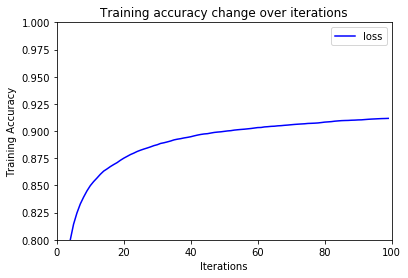

In [15]:
plot_data(train_accuracy_lr, 'loss', [0, 100, 0.8, 1], 'Iterations', 
          'Training Accuracy', 
          'Training accuracy change over iterations')


## Neural Network

In [16]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras.optimizers import RMSprop, Adam

X_train, y_train = training_data, train_labels
x_test, y_test = test_data, test_labels

def _get_model(input_size):

    drop_out = 0.2
    first_dense_layer_nodes  = 64
    second_dense_layer_nodes = 64
    third_dense_layer_nodes = 10

    model = Sequential()

    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('sigmoid'))
    model.add(Dropout(drop_out))

    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('sigmoid'))
    model.add(Dropout(drop_out))

    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))

    model.summary()

    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

model = _get_model(X_train.shape[1])

# NN Execution params
validation_data_split = 0.2
num_epochs = 1000
model_batch_size = 128
tb_batch_size = 64
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience
                                 , mode='min')

print(X_train.shape, y_train.shape)
history = model.fit(X_train
                    , y_train
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
__________

40000/40000 [==============================] - 1s 15us/step - loss: 0.0843 - acc: 0.9730 - val_loss: 0.1253 - val_acc: 0.9635
Epoch 50/1000
40000/40000 [==============================] - 1s 15us/step - loss: 0.0813 - acc: 0.9746 - val_loss: 0.1229 - val_acc: 0.9632
Epoch 51/1000
40000/40000 [==============================] - 1s 14us/step - loss: 0.0809 - acc: 0.9740 - val_loss: 0.1244 - val_acc: 0.9652
Epoch 52/1000
40000/40000 [==============================] - 1s 14us/step - loss: 0.0756 - acc: 0.9748 - val_loss: 0.1224 - val_acc: 0.9649
Epoch 53/1000
40000/40000 [==============================] - 1s 15us/step - loss: 0.0787 - acc: 0.9749 - val_loss: 0.1252 - val_acc: 0.9644
Epoch 54/1000
40000/40000 [==============================] - 1s 15us/step - loss: 0.0770 - acc: 0.9755 - val_loss: 0.1240 - val_acc: 0.9644
Epoch 55/1000
40000/40000 [==============================] - 1s 16us/step - loss: 0.0741 - acc: 0.9765 - val_loss: 0.1239 - val_acc: 0.9661
Epoch 56/1000
40000/40000 [=======

40000/40000 [==============================] - 1s 16us/step - loss: 0.0485 - acc: 0.9844 - val_loss: 0.1305 - val_acc: 0.9673
Epoch 108/1000
40000/40000 [==============================] - 1s 16us/step - loss: 0.0481 - acc: 0.9841 - val_loss: 0.1317 - val_acc: 0.9673
Epoch 109/1000
40000/40000 [==============================] - 1s 16us/step - loss: 0.0480 - acc: 0.9845 - val_loss: 0.1339 - val_acc: 0.9665
Epoch 110/1000
40000/40000 [==============================] - 1s 16us/step - loss: 0.0481 - acc: 0.9841 - val_loss: 0.1303 - val_acc: 0.9671
Epoch 111/1000
40000/40000 [==============================] - 1s 16us/step - loss: 0.0479 - acc: 0.9845 - val_loss: 0.1304 - val_acc: 0.9665
Epoch 112/1000
40000/40000 [==============================] - 1s 16us/step - loss: 0.0477 - acc: 0.9847 - val_loss: 0.1383 - val_acc: 0.9654
Epoch 113/1000
40000/40000 [==============================] - 1s 17us/step - loss: 0.0500 - acc: 0.9836 - val_loss: 0.1353 - val_acc: 0.9652
Epoch 114/1000
40000/40000 [

40000/40000 [==============================] - 1s 17us/step - loss: 0.0383 - acc: 0.9869 - val_loss: 0.1441 - val_acc: 0.9666
Epoch 00165: early stopping


### Random Forest

In [17]:
X_train, y_train = training_data, training_tar
X_test, y_test = test_data, test_tar

In [18]:
# Fit Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

# Predicting the Test set results
pred_rf_mnist = classifier_rf.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf_mnist = confusion_matrix(y_test, pred_rf_mnist)

In [19]:
import itertools
import matplotlib.pyplot as plt

def calculate_accuracy(confusion_matrix):
    correct = sum([confusion_matrix[i][i] for i in range(len(confusion_matrix[0]))])
    total_n = sum([sum(confusion_matrix[i]) for i in range(len(confusion_matrix))])
    return ((correct/total_n)*100)

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Random Forest - MNIST Accuracy : 96.04%


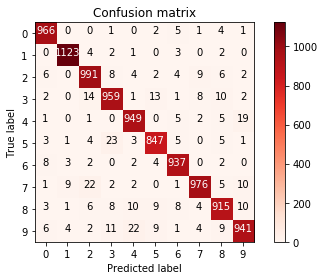

In [20]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf_mnist = confusion_matrix(y_test, pred_rf_mnist)
classifier_rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

print("Random Forest - MNIST Accuracy : {:.2f}%".format(calculate_accuracy(confusion_matrix=cm_rf_mnist)))

# Plot confusion matrix
classes = [str(i) for i in range(10)]
plt.figure()
plot_confusion_matrix(cm_rf_mnist, classes, title='Confusion matrix')

In [21]:
# Predict the Test set results
pred_rf_usps = classifier_rf.predict(USPSMat)

# Make the Confusion Matrix
cm_rf_usps = confusion_matrix(USPSTar, pred_rf_usps)

   Random Forest - USPS Accuracy : 35.33%


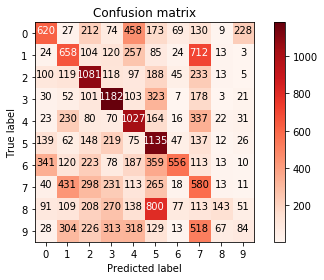

In [22]:
print("   Random Forest - USPS Accuracy : {:.2f}%".format(calculate_accuracy(confusion_matrix=cm_rf_usps)))

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm_rf_usps, classes, title='Confusion matrix')

### SVM

In [23]:
x_train, y_train = training_data, training_tar
x_test, y_test = test_data, test_tar

from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(training_data, y_train)

# Predict the Test set results
pred_svm_mnist = classifier_svm.predict(X_test)

# Make the Confusion Matrix
cm_svm_mnist = confusion_matrix(y_test, pred_svm_mnist)

  SVM - MNIST Accuracy : 93.90%


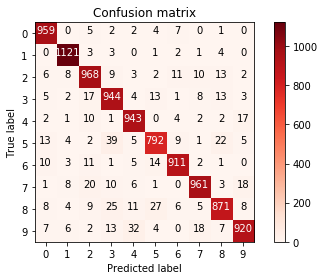

In [24]:
# Calculate Accuracy
print("  SVM - MNIST Accuracy : {:.2f}%".format(calculate_accuracy(confusion_matrix=cm_svm_mnist)))

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm_svm_mnist, classes, title='Confusion matrix')

In [25]:
from sklearn.ensemble import VotingClassifier